In [ ]:
import omdb
from omdb import Client
client = Client(apikey="67a495d5")
omdb.set_default('apikey', '67a495d5')

In [7]:
from pymongo import MongoClient

In [8]:
client = MongoClient()

In [9]:
db = client.primer

In [10]:
coll = db.dataset

In [11]:
db = client.test

In [12]:
cursor = db.movie.find()

In [13]:
import csv

In [117]:
with open('/Users/kristenkozmary/Desktop/moviesB.csv', encoding='latin-1') as f:
    reader = csv.reader(f)
    for row in reader:
        db.movie.insert_one(omdb.get(title=row))

In [15]:
db.movie.count()

32898

In [4]:
import pandas as pd

In [16]:
collection = db.movie

In [17]:
data = pd.DataFrame(list(collection.find()))

In [255]:
data.head()

,_id,actors,awards,box_office,country,director,dvd,genre,imdb_id,imdb_rating,...,rated,released,response,runtime,title,total_seasons,type,website,writer,year
0,59dd2853d1c97e2166632506,"Cary Elwes, Mandy Patinkin, Chris Sarandon, Ch...",Nominated for 1 Oscar. Another 7 wins & 8 nomi...,N/A,USA,Rob Reiner,26 Jan 1999,"Adventure, Family, Fantasy",tt0093779,8.1,...,PG,09 Oct 1987,True,98 min,The Princess Bride,NaN,movie,http://www.theprincessbride-themovie.com/,"William Goldman (book), William Goldman (scree...",1987
1,59dd29c642458f2244f63ae3,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Won 4 Oscars. Another 152 wins & 204 nominations.,"$292,568,851","USA, UK",Christopher Nolan,07 Dec 2010,"Action, Adventure, Sci-Fi",tt1375666,8.8,...,PG-13,16 Jul 2010,True,148 min,Inception,NaN,movie,http://inceptionmovie.warnerbros.com/,Christopher Nolan,2010
2,59dd2eca42458f2244f63ae4,"Jaeden Lieberher, Jeremy Ray Taylor, Sophia Li...",1 win.,"$266,096,375","USA, Canada",Andy Muschietti,N/A,"Drama, Horror, Thriller",tt1396484,7.9,...,R,08 Sep 2017,True,135 min,It,NaN,movie,http://www.Itthemovie.com,"Chase Palmer (screenplay by), Cary Fukunaga (s...",2017
3,59dd435f42458f2244f63ae5,"Daniel Radcliffe, Rupert Grint, Emma Watson, R...",Nominated for 3 BAFTA Film Awards. Another 11 ...,"$261,835,892","UK, USA, Germany",Chris Columbus,11 Apr 2003,"Adventure, Family, Fantasy",tt0295297,7.4,...,PG,15 Nov 2002,True,161 min,Harry Potter and the Chamber of Secrets,NaN,movie,http://harrypotter.warnerbros.com/,"J.K. Rowling (novel), Steve Kloves (screenplay)",2002
4,59dd43a642458f2244f63ae6,"Eileen Brennan, Tim Curry, Madeline Kahn, Chri...",N/A,N/A,USA,Jonathan Lynn,27 Jun 2000,"Comedy, Crime, Mystery",tt0088930,7.3,...,PG,13 Dec 1985,True,94 min,Clue,NaN,movie,N/A,"John Landis (story), Jonathan Lynn (story), Jo...",1985


In [256]:
pd.isnull(data).sum()

_id                  0
actors            6903
awards            6903
box_office        7283
country           6903
director          6903
dvd               7283
genre             6903
imdb_id           6903
imdb_rating       6903
imdb_votes        6903
language          6903
metascore         6903
plot              6903
poster            6903
production        7283
rated             6903
released          6903
response          6903
runtime           6903
title             6903
total_seasons    32518
type              6903
website           7283
writer            6903
year              6903
dtype: int64

In [19]:
del data['dvd']

In [20]:
del data['poster']

In [21]:
del data['released']

In [22]:
del data['response']

In [23]:
del data['type']

In [24]:
del data['runtime']

In [25]:
del data['website']

In [26]:
del data['imdb_id']

In [27]:
del data['imdb_votes']

In [ ]:
del data['_id']

In [29]:
del data['total_seasons']

In [30]:
del data['language']

In [31]:
data.count()

actors         25995
awards         25995
box_office     25615
country        25995
director       25995
genre          25995
imdb_rating    25995
metascore      25995
plot           25995
production     25615
rated          25995
title          25995
writer         25995
year           25995
dtype: int64

In [33]:
df = data.drop_duplicates(['title'], keep='first')

In [35]:
df.count()

actors         13908
awards         13908
box_office     13692
country        13908
director       13908
genre          13908
imdb_rating    13908
metascore      13908
plot           13908
production     13692
rated          13908
title          13908
writer         13908
year           13908
dtype: int64

In [36]:
cols = df.columns.tolist()

In [38]:
df = df[['title','actors','writer','plot','awards','box_office','country','director','genre','production','rated','year','imdb_rating','metascore']]

In [41]:
df.describe()

,title,actors,writer,plot,awards,box_office,country,director,genre,production,rated,year,imdb_rating,metascore
count,13908,13908,13908,13908,13908,13692,13908,13908,13908,13692,13908,13908,13908,13908
unique,13908,13584,11910,13326,2162,2595,1063,6437,905,1919,23,228,82,98
top,Timing,N/A,N/A,N/A,N/A,N/A,USA,N/A,Drama,N/A,R,2004,7.2,N/A
freq,1,196,751,579,4903,10989,7527,304,1031,2788,4079,477,610,9134


In [42]:
import numpy as np
import matplotlib

In [43]:
from scipy import stats, integrate

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

In [45]:
import seaborn as sns
sns.set(color_codes=True)

In [46]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [47]:
import sklearn.cluster as cluster
import time

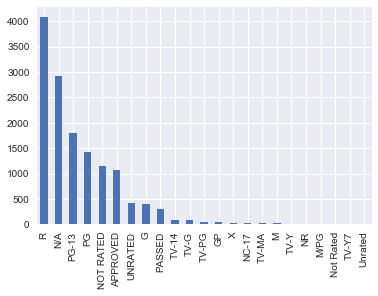

In [49]:
df['rated'].value_counts().plot(kind='bar')

In [ ]:
df['actors'].value_counts().plot(kind='bar')